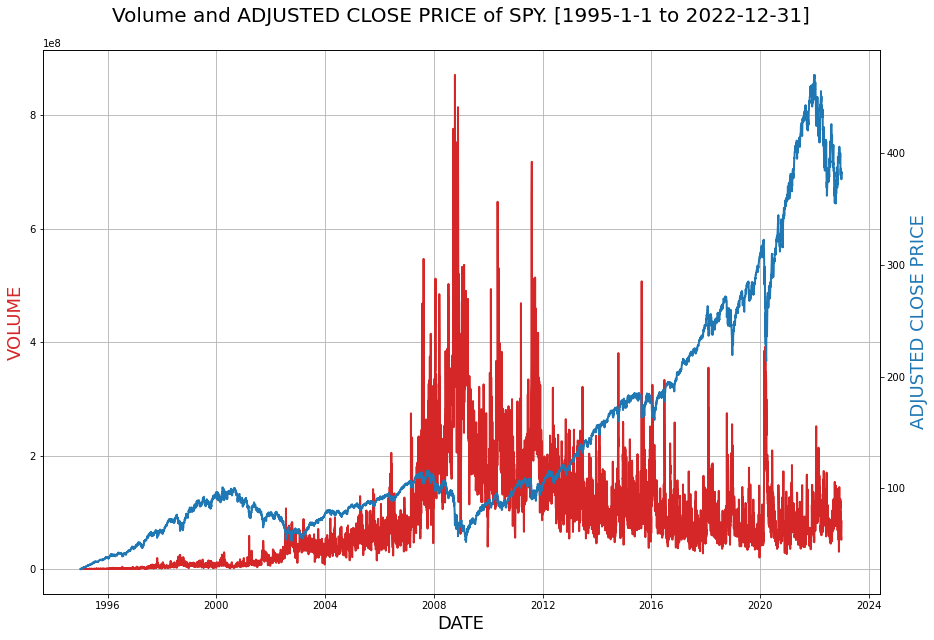

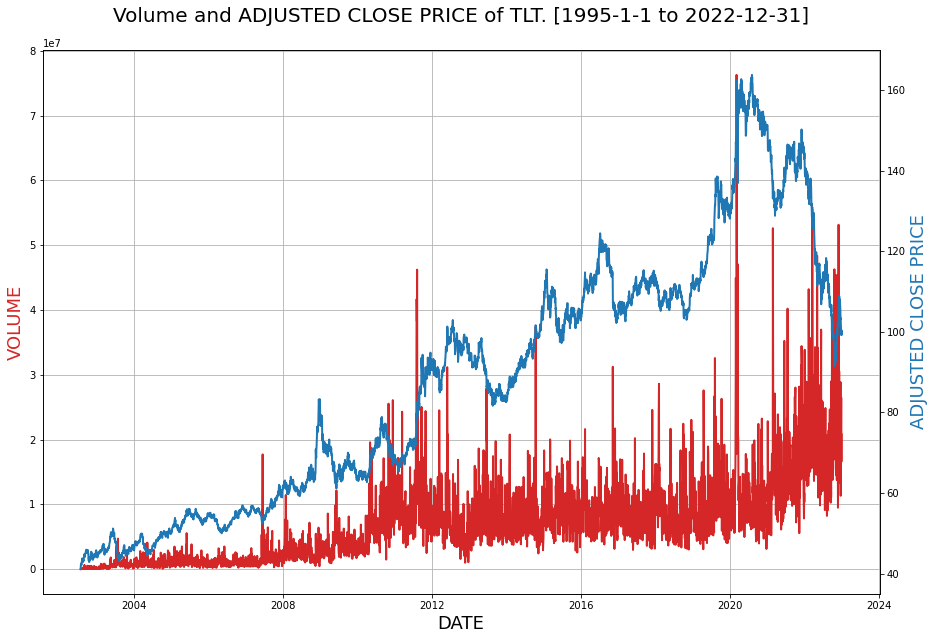

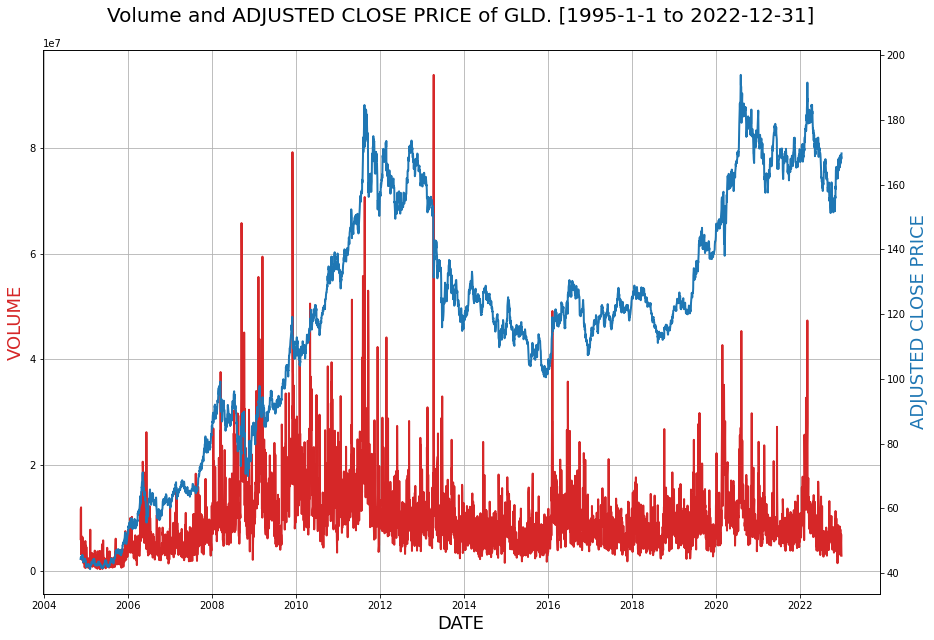

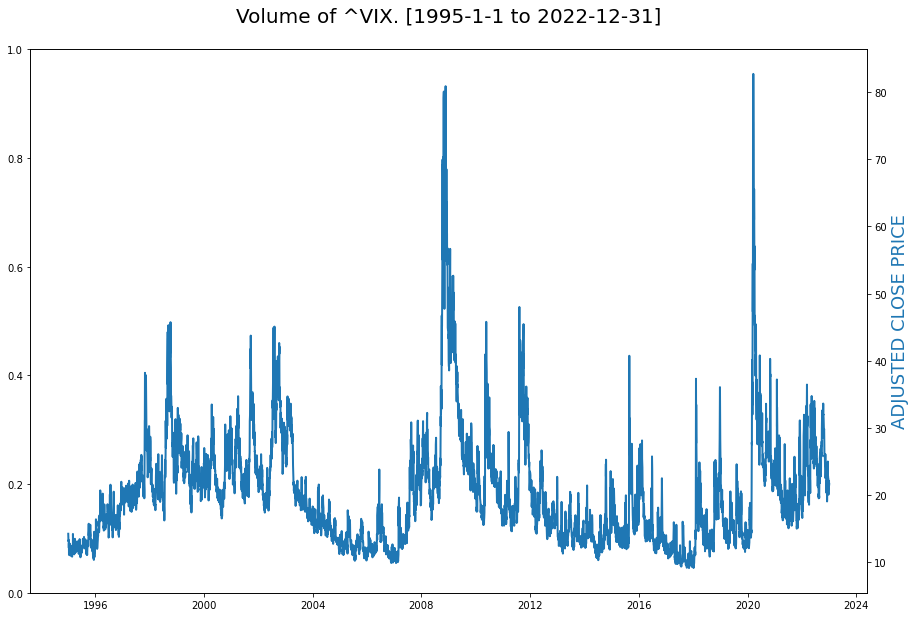

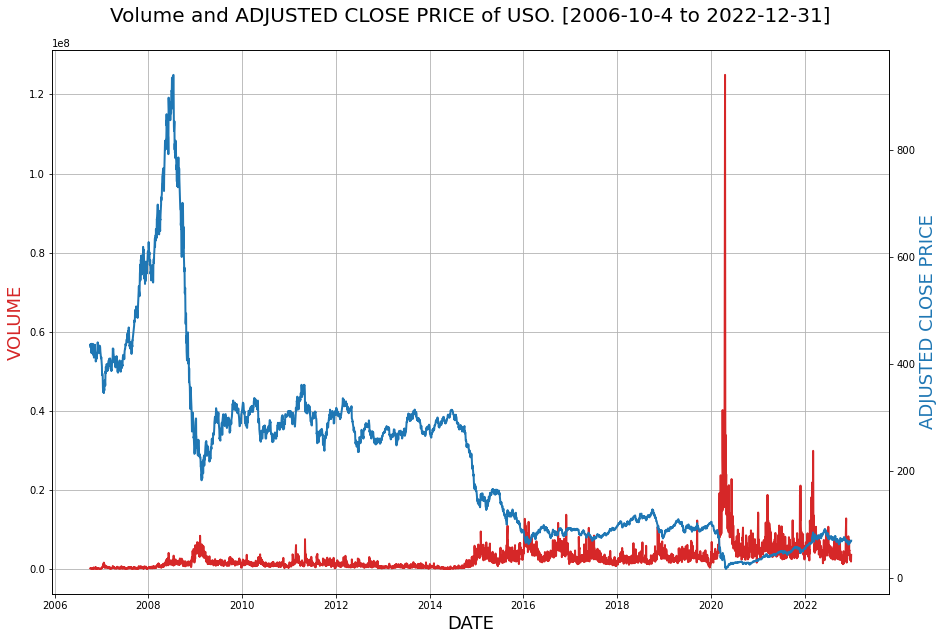

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


def plotData(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    #to filter rows based on date range
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    

    if(name!="^VIX"):
        color = 'tab:red'
        ax1.set_xlabel('DATE', fontsize=18) 
        ax1.set_ylabel('VOLUME', color=color, fontsize=18)
        ax1.plot(stock_data['Volume'], color=color, linewidth=2) 
        ax1.grid(True)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18) 
    ax2.plot(stock_data['Adj Close'], color=color, linewidth=2)
    if(name!='^VIX'):
        plt.title('Volume and ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    else:
        plt.title('Volume of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')

    plt.show()
    
plotData("SPY",'1995-1-1','2022-12-31')
plotData("TLT",'1995-1-1','2022-12-31')
plotData("GLD",'1995-1-1','2022-12-31')
plotData("^VIX",'1995-1-1','2022-12-31')
plotData("USO",'2006-10-4','2022-12-31')
    

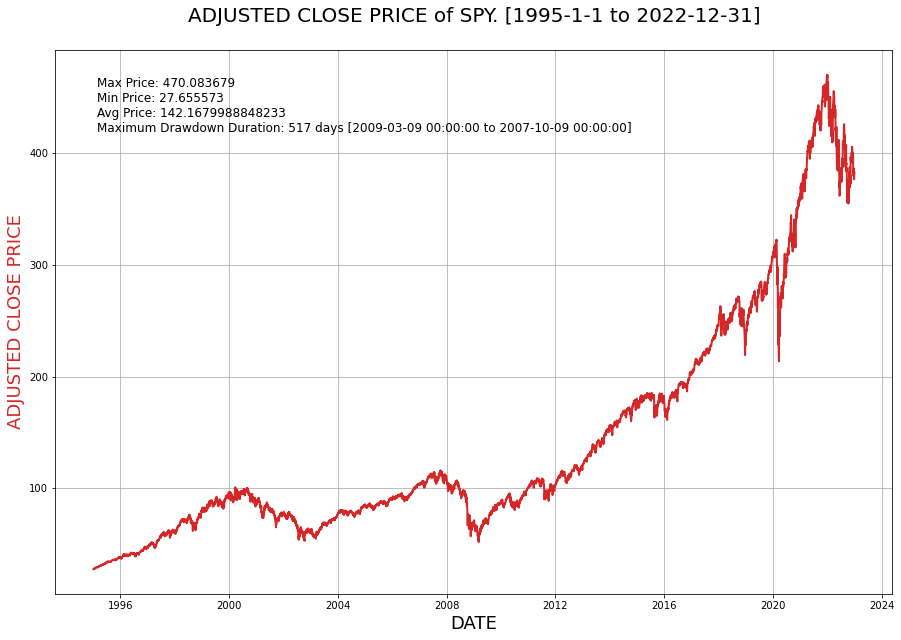

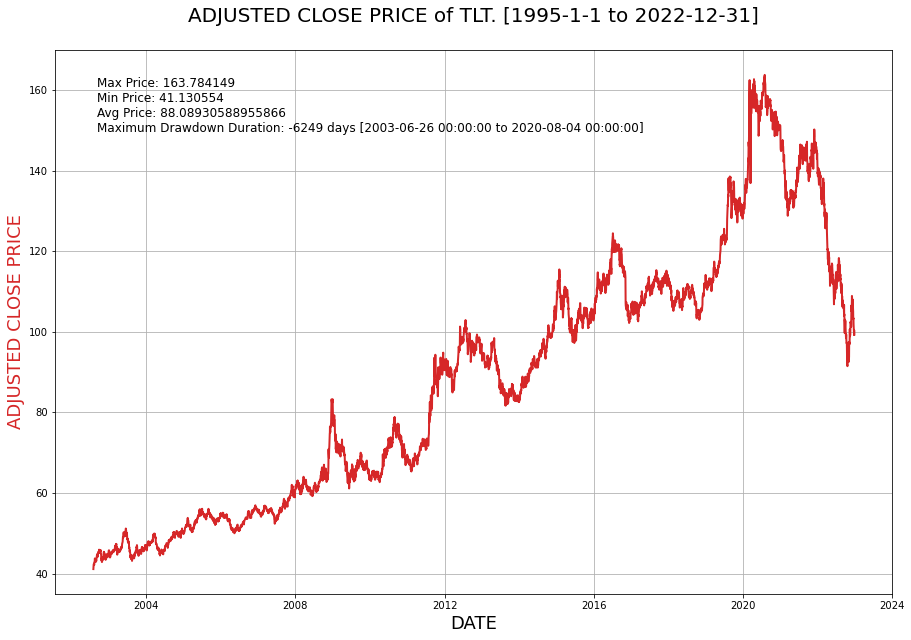

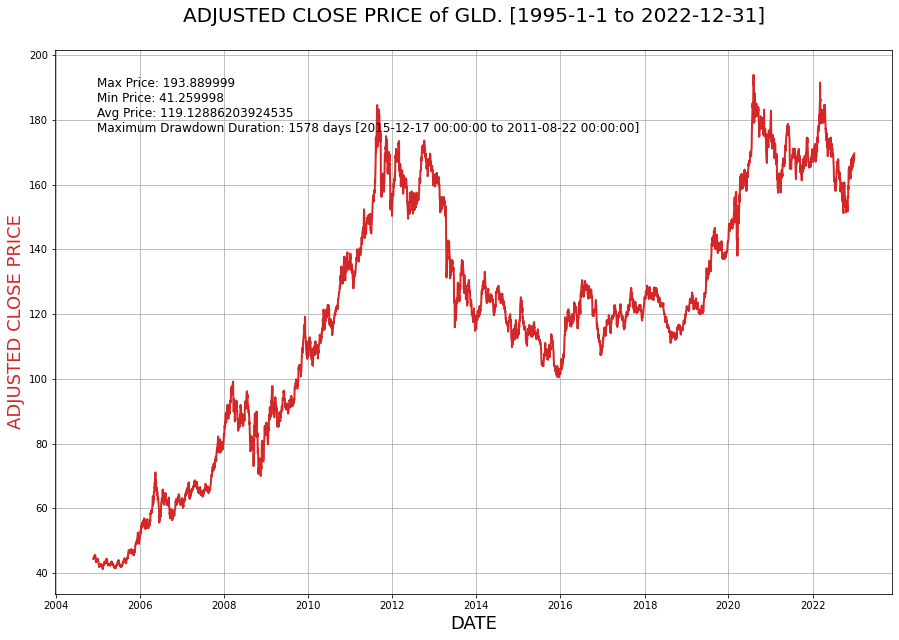

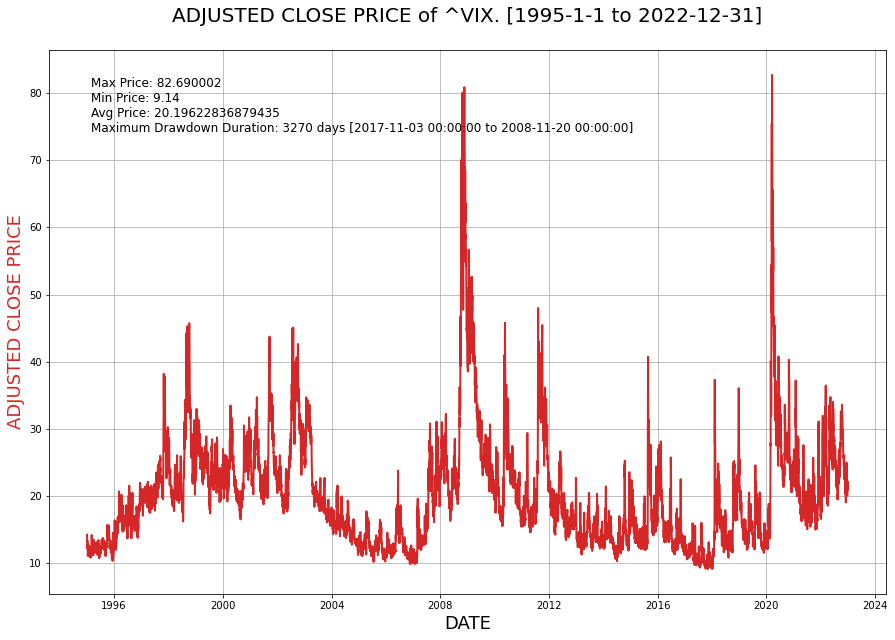

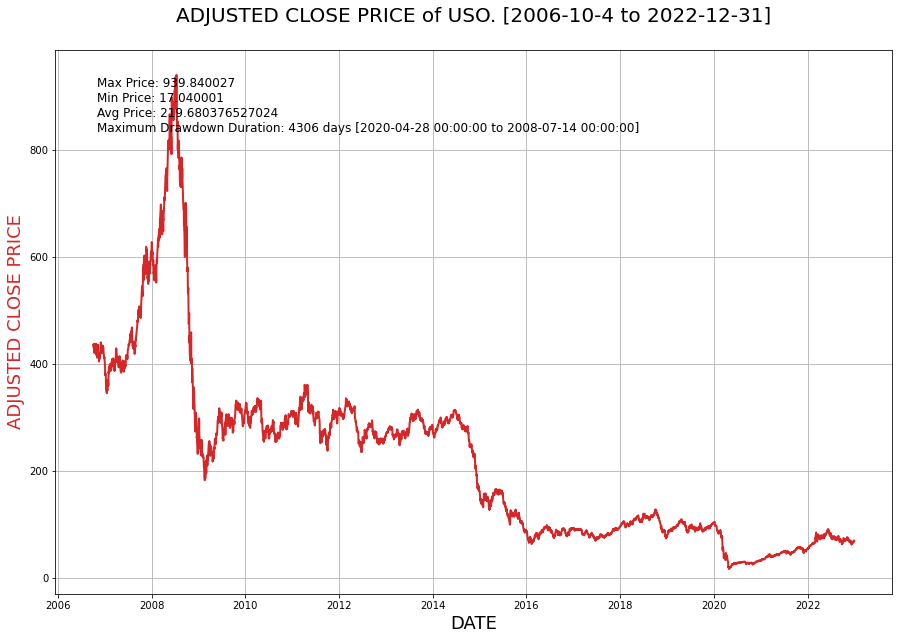

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import accumulate


def plotData(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)

    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    date1,date2,days=DRAWDOWN_DURATION(name, starttime,endtime)

    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18)
    ax1.plot(stock_data['Adj Close'], color=color, linewidth=2) 
    plt.title('ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    ax1.grid(True)

    max_price = stock_data['Adj Close'].max()
    min_price = stock_data['Adj Close'].min()
    avg_price = stock_data['Adj Close'].mean()
    text = "Max Price: "+str(max_price)+"\nMin Price: "+str(min_price)+"\nAvg Price: "+str(avg_price)+f"\nMaximum Drawdown Duration: {days} days [{date1} to {date2}]"

    plt.text(0.05, 0.95, text,
             transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
plotData("SPY",'1995-1-1','2022-12-31')
plotData("TLT",'1995-1-1','2022-12-31')
plotData("GLD",'1995-1-1','2022-12-31')
plotData("^VIX",'1995-1-1','2022-12-31')
plotData("USO",'2006-10-4','2022-12-31')

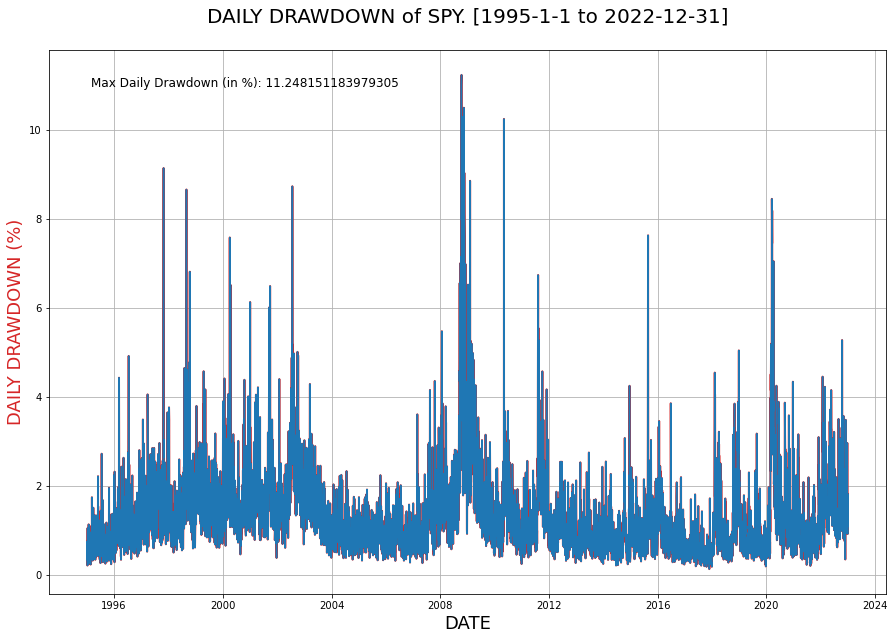

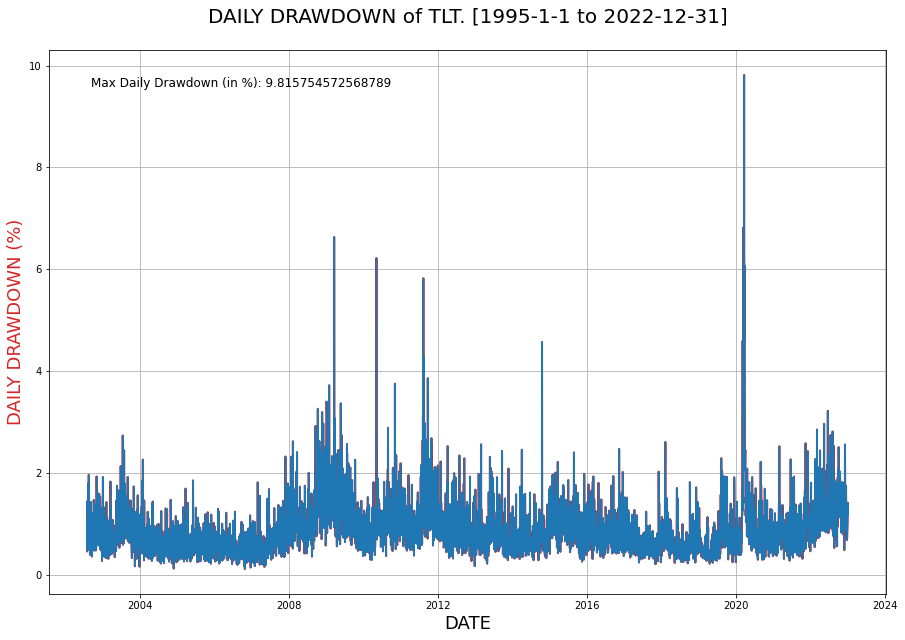

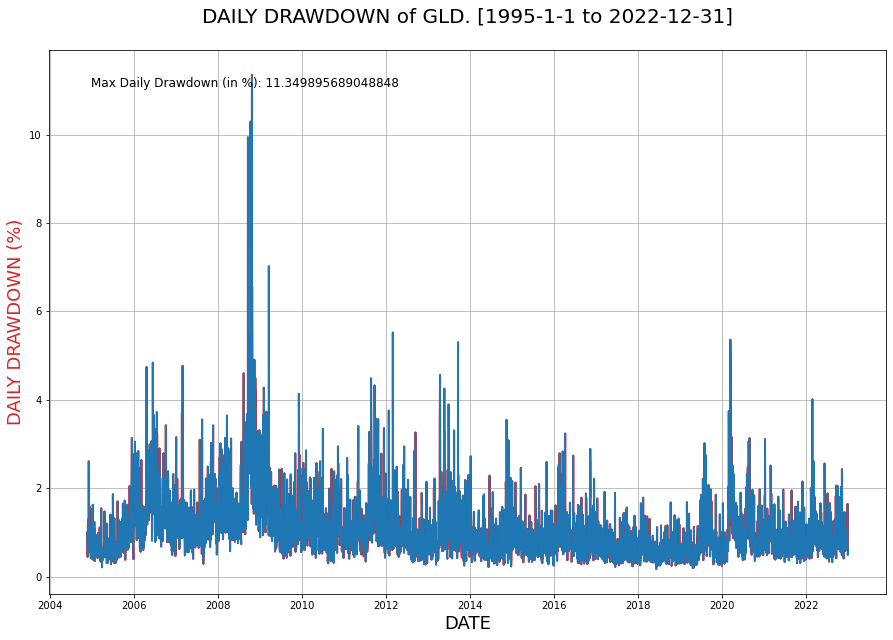

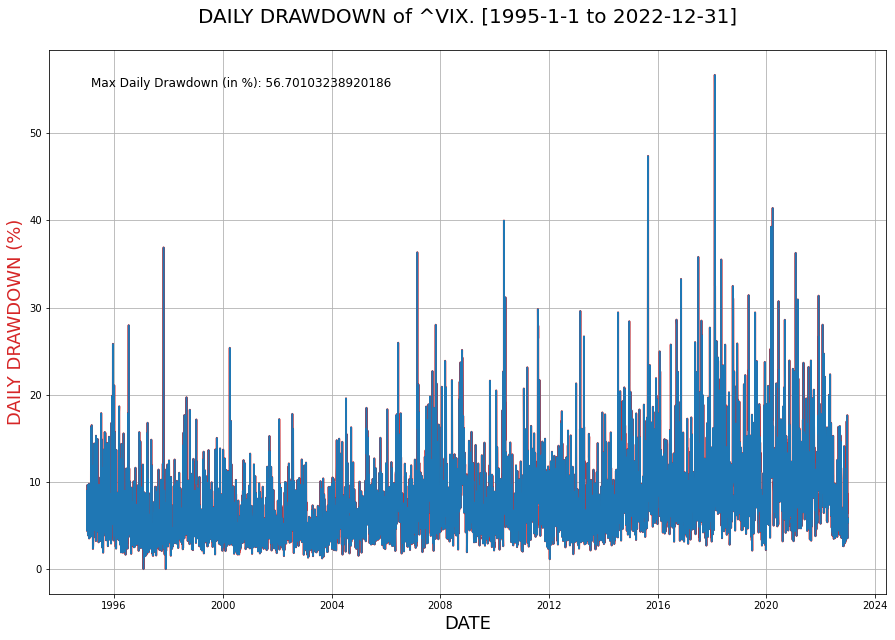

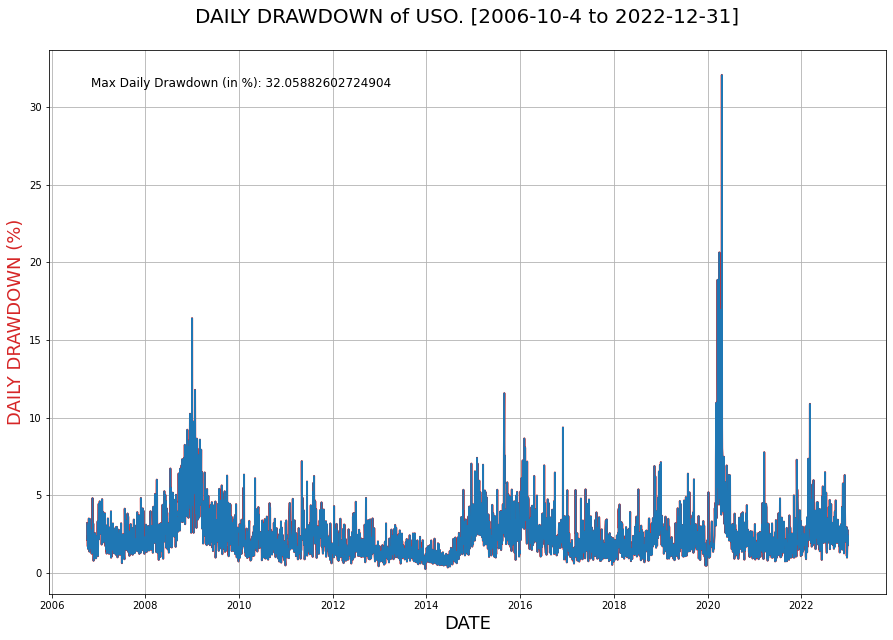

In [86]:
import matplotlib.pyplot as plt
import pandas as pd


def analysis(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date'])

 #daily drawdown 
    df['drawdown'] = (df['High'] - df['Low'])*100 / df['High']
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    

    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    max_drawdown=stock_data['drawdown'].max()    

    
    
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('DAILY DRAWDOWN (%)', color=color, fontsize=18)
    ax1.plot(stock_data['drawdown'], color=color, linewidth=2) 
    text = f"Max Daily Drawdown (in %): {max_drawdown}"
    plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
    plt.title('DAILY DRAWDOWN of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    ax1.grid(True)
    plt.plot(stock_data['drawdown'])
    plt.show()
    
analysis("SPY",'1995-1-1','2022-12-31')
analysis("TLT",'1995-1-1','2022-12-31')
analysis("GLD",'1995-1-1','2022-12-31')
analysis("^VIX",'1995-1-1','2022-12-31')
analysis("USO",'2006-10-4','2022-12-31')
    

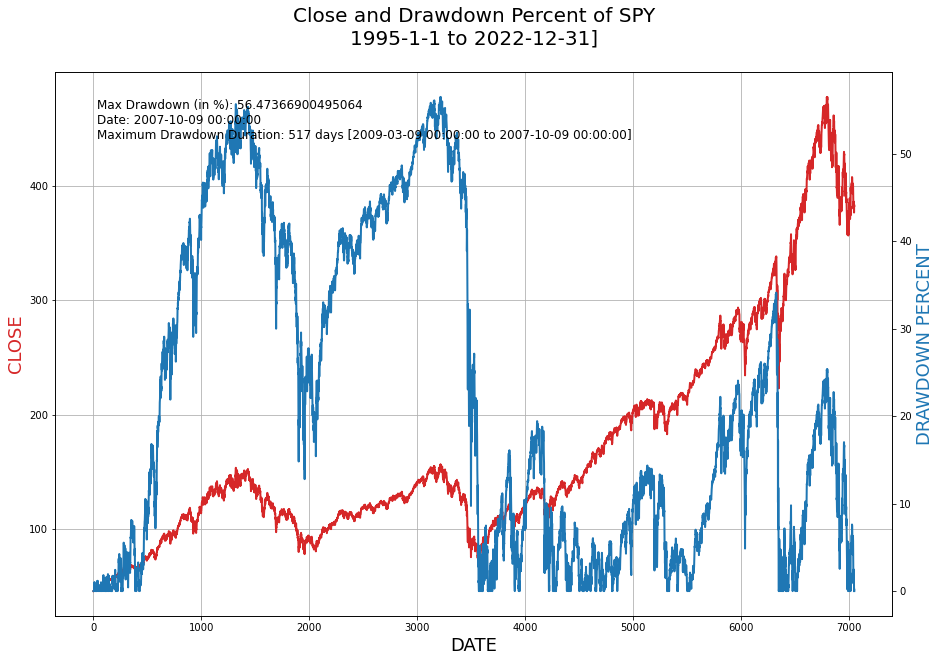

In [81]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# from datetime import date
# def numOfDays(date1, date2):
#     return (date2-date1).days

def DRAWDOWN_PERCENT(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
#     stock_data = df1.set_index('Date')
    stock_data=df1
    stock_data['DRAWDOWN PERCENT']=0
    stock_data = stock_data.reset_index(drop=True)

    minimum= stock_data['Close'].iloc[-1]
    for i in range(len(stock_data)):
        close_value = stock_data.loc[len(stock_data)-i-1, 'Close']
        minimum = min(minimum, close_value)
        stock_data.loc[len(stock_data)-i-1, 'DRAWDOWN PERCENT'] = ((close_value - minimum) * 100 / close_value)

    max_drawdown_percent= stock_data['DRAWDOWN PERCENT'].max()
    date=stock_data.loc[stock_data['DRAWDOWN PERCENT'] == max_drawdown_percent, 'Date'].iloc[0]
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('CLOSE', color=color, fontsize=18)
    ax1.plot(stock_data['Close'], color=color, linewidth=2) 
    ax1.grid(True)
    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('DRAWDOWN PERCENT', color=color, fontsize=18) 
    ax2.plot(stock_data['DRAWDOWN PERCENT'], color=color, linewidth=2)
    text = f"Max Drawdown (in %): {max_drawdown_percent}\nDate: {date}"
    plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')

    plt.title('Close and Drawdown Percent of '+name+"\n"+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    plt.show()

    
DRAWDOWN_PERCENT("SPY",'1995-1-1','2022-12-31')






In [80]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv(name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Volume'])

    
    xs = stock_data['Close']

    i = np.argmax(( np.maximum.accumulate(xs) - xs ) / np.maximum.accumulate(xs)) 
    j = np.argmax(xs[:i]) 
    p=xs[i]
    q=xs[j]
        
    date1=xs[stock_data['Close'] == p].index.tolist()[0]
    date2=xs[stock_data['Close'] == q].index.tolist()[0]

    days=(date1-date2).days

    return date1,date2,days
DRAWDOWN_DURATION("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("USO",'2006-10-4','2022-12-31')

         

(Timestamp('2020-04-28 00:00:00'), Timestamp('2008-07-14 00:00:00'), 4306)